In [1]:
# LeafGate: Yaprak / Yaprak Değil Sınıflandırma Modeli

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [2]:

# Veri yolları
base_dir = "./"
leaf_dir = os.path.join(base_dir, "leaf")
not_leaf_dir = os.path.join(base_dir, "notleaf")


In [3]:

# Parametreler
img_size = 224
batch_size = 32
epochs = 10


In [4]:

# Veri önişleme ve augmentasyon
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)


In [5]:

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [6]:

# Model mimarisi
base_model = MobileNetV2(include_top=False, input_shape=(img_size, img_size, 3), weights='imagenet')
base_model.trainable = False  # Transfer öğrenme

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


9406464/9406464 [==============================] - 1s 0us/step


In [7]:

# Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [8]:

# Eğitim
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stop]
)


Epoch 1/10
500/500 [==============================] - 424s 843ms/step - loss: 0.1524 - accuracy: 0.9683 - val_loss: 0.0443 - val_accuracy: 0.9970
Epoch 2/10
500/500 [==============================] - 264s 527ms/step - loss: 0.0274 - accuracy: 0.9983 - val_loss: 0.0213 - val_accuracy: 0.9975
Epoch 3/10
500/500 [==============================] - 277s 555ms/step - loss: 0.0143 - accuracy: 0.9989 - val_loss: 0.0124 - val_accuracy: 0.9985
Epoch 4/10
500/500 [==============================] - 261s 523ms/step - loss: 0.0093 - accuracy: 0.9993 - val_loss: 0.0094 - val_accuracy: 0.9985
Epoch 5/10
500/500 [==============================] - 252s 504ms/step - loss: 0.0067 - accuracy: 0.9994 - val_loss: 0.0059 - val_accuracy: 0.9998
Epoch 6/10
500/500 [==============================] - 255s 509ms/step - loss: 0.0048 - accuracy: 0.9994 - val_loss: 0.0057 - val_accuracy: 0.9985
Epoch 7/10
500/500 [==============================] - 285s 570ms/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 0.0046 -

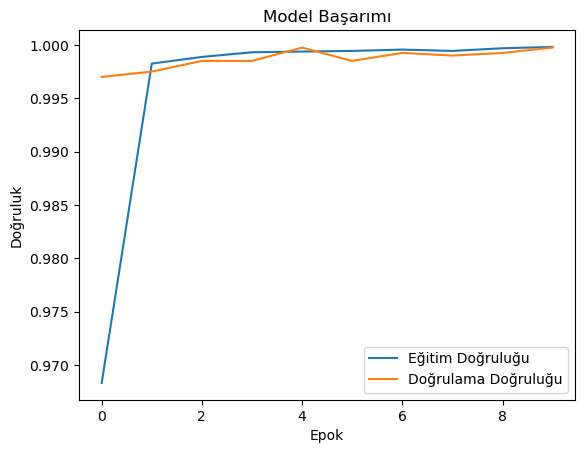

In [9]:

# Performans grafikleri
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epok')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Model Başarımı')
plt.show()


In [11]:
# Modeli kaydet
model.save("leafgate_model.h5")
